# MODELAGEM


- Treinar modelos baseline (Random Forest, Regressão Logística, SVM) em cada subconjunto de features
- Comparar o desempenho dos modelos, verificando se a redução de atributos mantém ou melhora a acuracia
- TREINAR, AVALIAR E COMPARAR

- Lembrando dos subconjuntos selecionados no notebook 1_Preparacao:
  - variaveis selecionadas usando Mutual Information, RFE, Random Forest
  - top 10 e top 5
  - vamos usar todas as features tambem
    - X_all.csv
    - X_mi_top10.csv, X_mi_top5.csv
    - X_rfe_top10.csv, X_rfe_top5.csv
    - X_rf_top10.csv, X_rf_top5.csv

- PROXIMO COLAB: 3_Explicabilidade

## CARREGAMENTO

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib.lines import Line2D

In [3]:
BASE_URL = "https://raw.githubusercontent.com/AnaClaraGuerra22/INF-493-CD/b73db988dc3a0d8fd99607391b66aa564edeecde/TRAB%20FINAL/DATASET"


df_scaled = pd.read_csv(f"{BASE_URL}/DATASET_PREPROCESSADOS/StressLevelDataset_Scaled.csv")
print("Dataset principal carregado\n")
print(df_scaled.head(), "\n")


y = df_scaled['stress_level']
X = df_scaled.drop(columns=['stress_level'])


paths = {
    'X_all': f"{BASE_URL}/SELECAO_FEATURES/X_all.csv",
    'X_mi_top10': f"{BASE_URL}/SELECAO_FEATURES/X_mi_top10.csv",
    'X_mi_top5': f"{BASE_URL}/SELECAO_FEATURES/X_mi_top5.csv",
    'X_rfe_top10': f"{BASE_URL}/SELECAO_FEATURES/X_rfe_top10.csv",
    'X_rfe_top5': f"{BASE_URL}/SELECAO_FEATURES/X_rfe_top5.csv",
    'X_rf_top10': f"{BASE_URL}/SELECAO_FEATURES/X_rf_top10.csv",
    'X_rf_top5': f"{BASE_URL}/SELECAO_FEATURES/X_rf_top5.csv",
}

datasets = {}

for name, path in paths.items():
    datasets[name] = pd.read_csv(path)
    print(f"{name} carregado: {datasets[name].shape}")




datasets['X_mi_top10'].head()


Dataset principal carregado

   id_pessoa  anxiety_level  self_esteem  mental_health_history  depression  \
0          1       0.666667     0.666667                    0.0    0.407407   
1          2       0.714286     0.266667                    1.0    0.555556   
2          3       0.571429     0.600000                    1.0    0.518519   
3          4       0.761905     0.400000                    1.0    0.555556   
4          5       0.761905     0.933333                    0.0    0.259259   

   headache  blood_pressure  sleep_quality  breathing_problem  noise_level  \
0       0.4             0.0            0.4                0.8          0.4   
1       1.0             1.0            0.2                0.8          0.6   
2       0.4             0.0            0.4                0.4          0.4   
3       0.8             1.0            0.2                0.6          0.8   
4       0.4             1.0            1.0                0.2          0.6   

   ...  basic_needs  academ

,blood_pressure,bullying,future_career_concerns,sleep_quality,depression,anxiety_level,self_esteem,headache,academic_performance,extracurricular_activities
0,0.0,0.4,0.6,0.4,0.407407,0.666667,0.666667,0.4,0.6,0.6
1,1.0,1.0,1.0,0.2,0.555556,0.714286,0.266667,1.0,0.2,1.0
2,0.0,0.4,0.4,0.4,0.518519,0.571429,0.600000,0.4,0.4,0.4
3,1.0,1.0,0.8,0.2,0.555556,0.761905,0.400000,0.8,0.4,0.8
4,1.0,1.0,0.4,1.0,0.259259,0.761905,0.933333,0.4,0.8,0.0


## DIVIDIR TREINO E TESTE

In [4]:
# 20/80

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Treino: {X_train.shape} \nTeste: {X_test.shape}\n\n")
print(f"Distribuiçao treino:\n{y_train.value_counts(normalize=True)*100}\n")
print(f"Distribuiçao teste:\n{y_test.value_counts(normalize=True)*100}\n")


Treino: (880, 21) 
Teste: (220, 21)


Distribuiçao treino:
stress_level
0    33.977273
2    33.522727
1    32.500000
Name: proportion, dtype: float64

Distribuiçao teste:
stress_level
0    33.636364
2    33.636364
1    32.727273
Name: proportion, dtype: float64



Conclusao:
- balanceamento preservado
- dados bem divididos e balanceados
- OK


## MODELAGEM
- usaremos diferentes algoritmos supervisionados de classificaçao
  - Regressão Logística (RL):	Linear
  - KNN:	Baseado em distancia
  - Decision Tree (DT):	Arvores
  - Random Forest (RF):	Ensemble
  - SVM:	Margem maxima
  - Gradient Boosting	(GB):	Ensemble
  - Multi-Layer Perceptron	(MLP):	Rede Neural

- DEFINIÇAO DE HIPERPARAMETROS USANDO AS ANALISES FEITAS NO NOTEBOOK 1_PreProcessamento (Principalmente PCA e LDA)

<img src="https://raw.githubusercontent.com/AnaClaraGuerra22/INF-493-CD/824ad76bdfb7b0d01533c4c636798cb6753231b1/TRAB%20FINAL/pca.png" width="400px" style="display: inline; margin-right: 20px;">

<img src="https://raw.githubusercontent.com/AnaClaraGuerra22/INF-493-CD/824ad76bdfb7b0d01533c4c636798cb6753231b1/TRAB%20FINAL/lda.png" width="400px" style="display: inline;">

### PCA
- ha grupos parcialmente separados, mas com alguma sobreposição
- significa que os limites de decisão não são lineares
- Modelos lineares simples (como Regressão Logistica) podem não capturar bem todas as relaçoes

- ajuste nos hiperparametros
  - Para modelos baseados em distancia (KNN, SVM)
    - SVM: kernel não linear (rbf )
    - KNN: n_neighbors pequeno (5-10), pq ha separaçoes locais

  - Para modelos de árvores (Decision Tree, RF, GB)
    - clusters mostram relaçoes nao lineares: arvores lidam bem com isso
    - pode usar profundidades medias (max_depth=4-8) sem underfitting

### LDA
- ha sobreposição entre as classes, semelhante ao que foi visto no PCA.
- Alguns agrupamentos aparecem mais densos, mas as fronteiras continuam difusas e não lineares

- ajuste nos hiperparametros
  - GB: ajustar o modelo de forma gradual
    - learning_rate baixo (0.05–0.1) e n_estimators mais alto (200–300), evitar overfitting
  - MLP: nao é necessário um modelo profundo
  - estrutura simples, com uma camada intermediaria moderada (hidden_layer_sizes=(50,)) e função de ativação relu

In [5]:

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),

    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),

    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=6,
        random_state=42
    ),

    "SVM": SVC(kernel="rbf", C=1.0, gamma='scale', random_state=42),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=250,
        learning_rate=0.08,
        max_depth=4,
        random_state=42
    ),

    "MLP": MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        solver='adam',
        alpha=0.001,
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42
    )
}

In [6]:
subconjuntos = {
    "Todas as Features": X,
    "Mutual Info (Top 10)": datasets["X_mi_top10"],
    "Mutual Info (Top 5)": datasets["X_mi_top5"],
    "Random Forest (Top 10)": datasets["X_rf_top10"],
    "Random Forest (Top 5)": datasets["X_rf_top5"],
    "RFE (Top 10)": datasets["X_rfe_top10"],
    "RFE (Top 5)": datasets["X_rfe_top5"]
}

In [7]:
def plot_confusion_matrix(y_true, y_pred, model_name, subset_name, classes, output_dir):

    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)

    plt.figure(figsize=(6, 5))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão\n{model_name} - {subset_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')


    safe_model_name = model_name.replace(" ", "_").replace("/", "_")
    safe_subset_name = subset_name.replace(" ", "_").replace("/", "_")
    filename = f"{output_dir}/cm_{safe_model_name}_{safe_subset_name}.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print(f"Matriz de confusão salva em: {filename}")

### TREINAR E SALVAR AS MATRIZES DE CONFUSAO

In [8]:
classes = [0, 1, 2]

resultados = []
output_dir = './matrizes_confusao'
os.makedirs(output_dir, exist_ok=True)

for nome_sub, X_sub in subconjuntos.items():
    print(f"\n🔹 Subconjunto: {nome_sub} ({X_sub.shape[1]} features)")

    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
        X_sub, y, test_size=0.2, random_state=42, stratify=y
    )

    for nome_modelo, modelo in modelos.items():
        modelo.fit(X_train_sub, y_train_sub)
        y_pred = modelo.predict(X_test_sub)

        acc = accuracy_score(y_test_sub, y_pred)
        f1 = f1_score(y_test_sub, y_pred, average="macro")

        resultados.append({
            "Subconjunto": nome_sub,
            "Modelo": nome_modelo,
            "Acurácia": acc,
            "F1 Score (macro)": f1
        })

        print(f"{nome_modelo:<20} | Acurácia: {acc:.3f} | F1: {f1:.3f}")

        plot_confusion_matrix(y_test_sub, y_pred, nome_modelo, nome_sub, classes, output_dir)


df_resultados = pd.DataFrame(resultados)


🔹 Subconjunto: Todas as Features (21 features)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regressão Logística  | Acurácia: 0.882 | F1: 0.882
Matriz de confusão salva em: ./matrizes_confusao/cm_Regressão_Logística_Todas_as_Features.png
KNN                  | Acurácia: 0.432 | F1: 0.426
Matriz de confusão salva em: ./matrizes_confusao/cm_KNN_Todas_as_Features.png
Decision Tree        | Acurácia: 0.868 | F1: 0.868
Matriz de confusão salva em: ./matrizes_confusao/cm_Decision_Tree_Todas_as_Features.png
Random Forest        | Acurácia: 0.886 | F1: 0.886
Matriz de confusão salva em: ./matrizes_confusao/cm_Random_Forest_Todas_as_Features.png
SVM                  | Acurácia: 0.355 | F1: 0.276
Matriz de confusão salva em: ./matrizes_confusao/cm_SVM_Todas_as_Features.png
Gradient Boosting    | Acurácia: 0.864 | F1: 0.864
Matriz de confusão salva em: ./matrizes_confusao/cm_Gradient_Boosting_Todas_as_Features.png
MLP                  | Acurácia: 0.873 | F1: 0.873
Matriz de confusão salva em: ./matrizes_confusao/cm_MLP_Todas_as_Features.png

🔹 Subconjunto: Mutual Info (Top 10) (10 featur

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP                  | Acurácia: 0.909 | F1: 0.909
Matriz de confusão salva em: ./matrizes_confusao/cm_MLP_Mutual_Info_(Top_10).png

🔹 Subconjunto: Mutual Info (Top 5) (5 features)
Regressão Logística  | Acurácia: 0.905 | F1: 0.906
Matriz de confusão salva em: ./matrizes_confusao/cm_Regressão_Logística_Mutual_Info_(Top_5).png
KNN                  | Acurácia: 0.873 | F1: 0.872
Matriz de confusão salva em: ./matrizes_confusao/cm_KNN_Mutual_Info_(Top_5).png
Decision Tree        | Acurácia: 0.873 | F1: 0.873
Matriz de confusão salva em: ./matrizes_confusao/cm_Decision_Tree_Mutual_Info_(Top_5).png
Random Forest        | Acurácia: 0.864 | F1: 0.863
Matriz de confusão salva em: ./matrizes_confusao/cm_Random_Forest_Mutual_Info_(Top_5).png
SVM                  | Acurácia: 0.873 | F1: 0.873
Matriz de confusão salva em: ./matrizes_confusao/cm_SVM_Mutual_Info_(Top_5).png
Gradient Boosting    | Acurácia: 0.882 | F1: 0.882
Matriz de confusão salva em: ./matrizes_confusao/cm_Gradient_Boosting_Mutual_

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP                  | Acurácia: 0.877 | F1: 0.878
Matriz de confusão salva em: ./matrizes_confusao/cm_MLP_Random_Forest_(Top_10).png

🔹 Subconjunto: Random Forest (Top 5) (5 features)
Regressão Logística  | Acurácia: 0.891 | F1: 0.892
Matriz de confusão salva em: ./matrizes_confusao/cm_Regressão_Logística_Random_Forest_(Top_5).png
KNN                  | Acurácia: 0.864 | F1: 0.865
Matriz de confusão salva em: ./matrizes_confusao/cm_KNN_Random_Forest_(Top_5).png
Decision Tree        | Acurácia: 0.868 | F1: 0.868
Matriz de confusão salva em: ./matrizes_confusao/cm_Decision_Tree_Random_Forest_(Top_5).png
Random Forest        | Acurácia: 0.868 | F1: 0.868
Matriz de confusão salva em: ./matrizes_confusao/cm_Random_Forest_Random_Forest_(Top_5).png
SVM                  | Acurácia: 0.877 | F1: 0.878
Matriz de confusão salva em: ./matrizes_confusao/cm_SVM_Random_Forest_(Top_5).png
Gradient Boosting    | Acurácia: 0.877 | F1: 0.877
Matriz de confusão salva em: ./matrizes_confusao/cm_Gradient_Bo

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP                  | Acurácia: 0.891 | F1: 0.891
Matriz de confusão salva em: ./matrizes_confusao/cm_MLP_RFE_(Top_10).png

🔹 Subconjunto: RFE (Top 5) (10 features)
Regressão Logística  | Acurácia: 0.905 | F1: 0.905
Matriz de confusão salva em: ./matrizes_confusao/cm_Regressão_Logística_RFE_(Top_5).png
KNN                  | Acurácia: 0.877 | F1: 0.877
Matriz de confusão salva em: ./matrizes_confusao/cm_KNN_RFE_(Top_5).png
Decision Tree        | Acurácia: 0.882 | F1: 0.882
Matriz de confusão salva em: ./matrizes_confusao/cm_Decision_Tree_RFE_(Top_5).png
Random Forest        | Acurácia: 0.895 | F1: 0.896
Matriz de confusão salva em: ./matrizes_confusao/cm_Random_Forest_RFE_(Top_5).png
SVM                  | Acurácia: 0.886 | F1: 0.886
Matriz de confusão salva em: ./matrizes_confusao/cm_SVM_RFE_(Top_5).png
Gradient Boosting    | Acurácia: 0.877 | F1: 0.877
Matriz de confusão salva em: ./matrizes_confusao/cm_Gradient_Boosting_RFE_(Top_5).png
MLP                  | Acurácia: 0.891 | F1: 0

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## VISUALIZAÇÕES

In [9]:
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by=["Acurácia"], ascending=False)

print("\nRESULTADOS FINAIS:")
display(df_resultados)


RESULTADOS FINAIS:


,Subconjunto,Modelo,Acurácia,F1 Score (macro)
13,Mutual Info (Top 10),MLP,0.909091,0.909137
14,Mutual Info (Top 5),Regressão Logística,0.904545,0.905831
42,RFE (Top 5),Regressão Logística,0.904545,0.904857
35,RFE (Top 10),Regressão Logística,0.904545,0.904857
7,Mutual Info (Top 10),Regressão Logística,0.900000,0.901390
45,RFE (Top 5),Random Forest,0.895455,0.895544
38,RFE (Top 10),Random Forest,0.895455,0.895544
11,Mutual Info (Top 10),SVM,0.890909,0.892004
8,Mutual Info (Top 10),KNN,0.890909,0.890668
12,Mutual Info (Top 10),Gradient Boosting,0.890909,0.890877


In [10]:
melhores = df_resultados.groupby("Subconjunto").apply(lambda x: x.nlargest(1, "Acurácia"))
display(melhores[["Subconjunto", "Modelo", "Acurácia", "F1 Score (macro)"]])

/tmp/ipython-input-2903184179.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melhores = df_resultados.groupby("Subconjunto").apply(lambda x: x.nlargest(1, "Acurácia"))


,,Subconjunto,Modelo,Acurácia,F1 Score (macro)
Subconjunto,,,,,
Mutual Info (Top 10),13,Mutual Info (Top 10),MLP,0.909091,0.909137
Mutual Info (Top 5),14,Mutual Info (Top 5),Regressão Logística,0.904545,0.905831
RFE (Top 10),35,RFE (Top 10),Regressão Logística,0.904545,0.904857
RFE (Top 5),42,RFE (Top 5),Regressão Logística,0.904545,0.904857
Random Forest (Top 10),24,Random Forest (Top 10),Random Forest,0.886364,0.886649
Random Forest (Top 5),28,Random Forest (Top 5),Regressão Logística,0.890909,0.892300
Todas as Features,3,Todas as Features,Random Forest,0.886364,0.886032


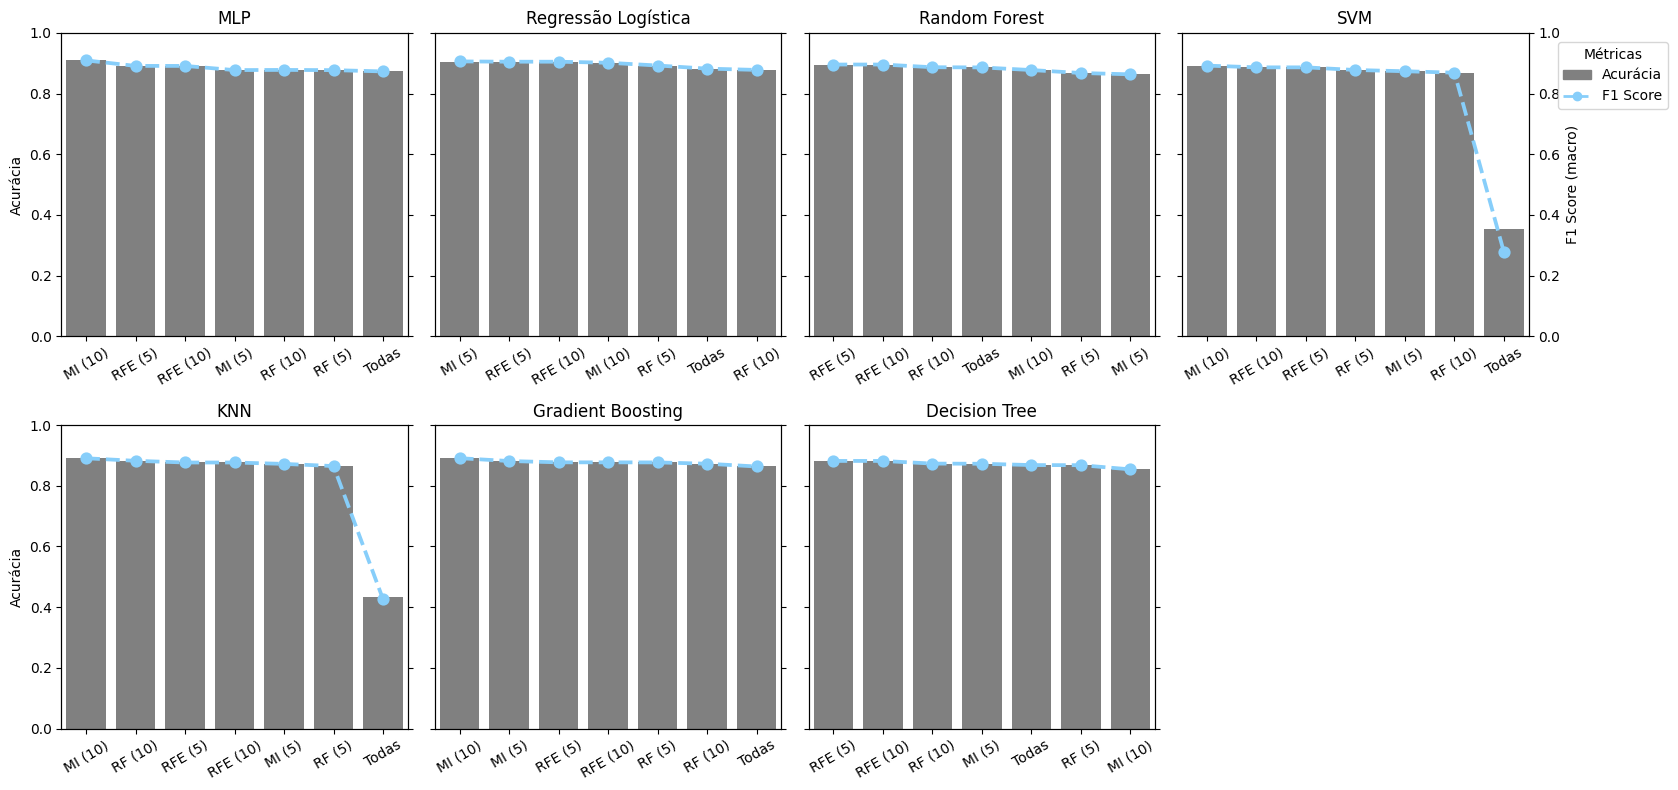

In [11]:
mapeamento_nomes = {
    "Todas as Features": "Todas",
    "Mutual Info (Top 10)": "MI (10)",
    "Mutual Info (Top 5)": "MI (5)",
    "Random Forest (Top 10)": "RF (10)",
    "Random Forest (Top 5)": "RF (5)",
    "RFE (Top 10)": "RFE (10)",
    "RFE (Top 5)": "RFE (5)"
}


df_resultados["Subconjunto_Abreviado"] = df_resultados["Subconjunto"].map(mapeamento_nomes)

modelos_unicos = df_resultados["Modelo"].unique()


n_modelos = len(modelos_unicos)
n_cols = 4 if n_modelos > 4 else n_modelos
n_rows = (n_modelos + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8), tight_layout=True)
axes = axes.flatten()

for i, modelo in enumerate(modelos_unicos):
    ax1 = axes[i]

    df_modelo = df_resultados[df_resultados["Modelo"] == modelo]

    sns.barplot(
        data=df_modelo,
        x="Subconjunto_Abreviado",
        y="Acurácia",
        ax=ax1,
        color='gray'
    )
    ax1.set_title(f"{modelo}", fontsize=12)
    ax1.set_xlabel("")


    if i % n_cols != 0:
        ax1.set_ylabel("")
        ax1.set_yticklabels([])

    ax1.set_ylim(0.0, 1.0)
    ax1.tick_params(axis='y', labelcolor='black')


    ax2 = ax1.twinx()
    sns.pointplot(
        data=df_modelo,
        x="Subconjunto_Abreviado",
        y="F1 Score (macro)",
        ax=ax2,
        color='lightskyblue',
        linestyles="--",
        marker="o"
    )


    if (i + 1) % n_cols != 0:
        ax2.set_ylabel("")
        ax2.set_yticklabels([])

    ax2.set_ylim(0.0, 1.0)
    ax2.tick_params(axis='y', labelcolor='black')

    ax1.tick_params(axis='x', rotation=30)


for j in range(i + 1, len(axes)):
    axes[j].axis('off')


legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='gray', ec='gray', label='Acurácia'),
    Line2D([0], [0], color='lightskyblue', lw=2, linestyle='--', marker='o', label='F1 Score')
]

fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.05, 0.95), title="Métricas")

plt.show()

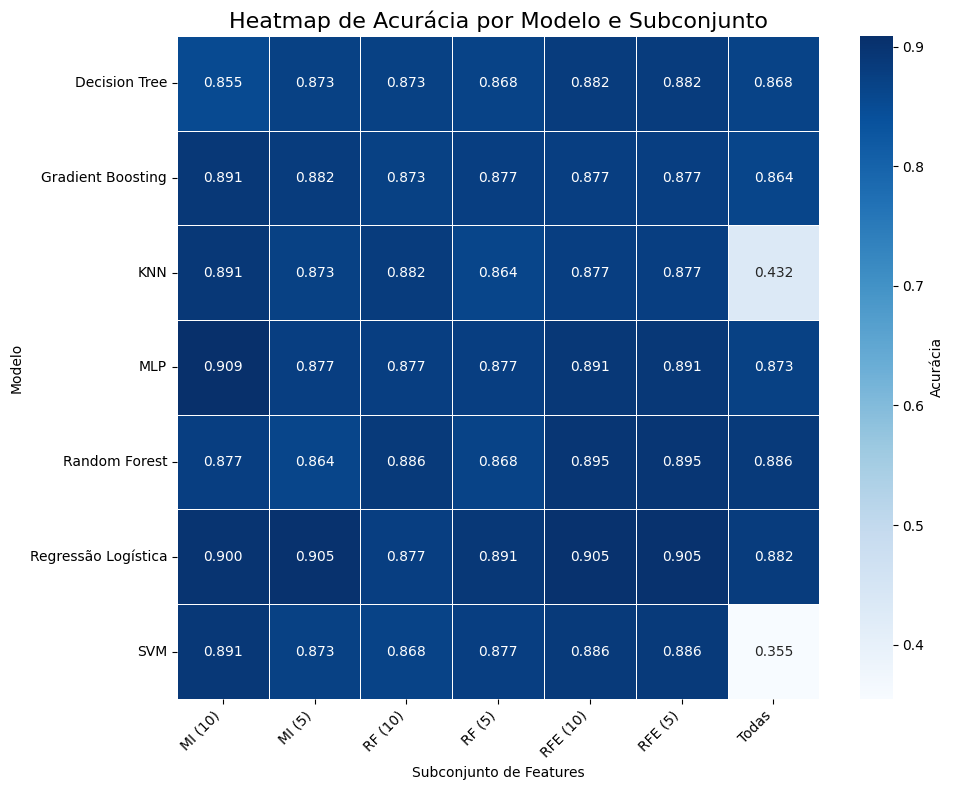

In [12]:
heatmap_data = df_resultados.pivot_table(
    index="Modelo",
    columns="Subconjunto_Abreviado",
    values="Acurácia"
)


plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Acurácia'}
)
plt.title("Heatmap de Acurácia por Modelo e Subconjunto", fontsize=16)
plt.xlabel("Subconjunto de Features")
plt.ylabel("Modelo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

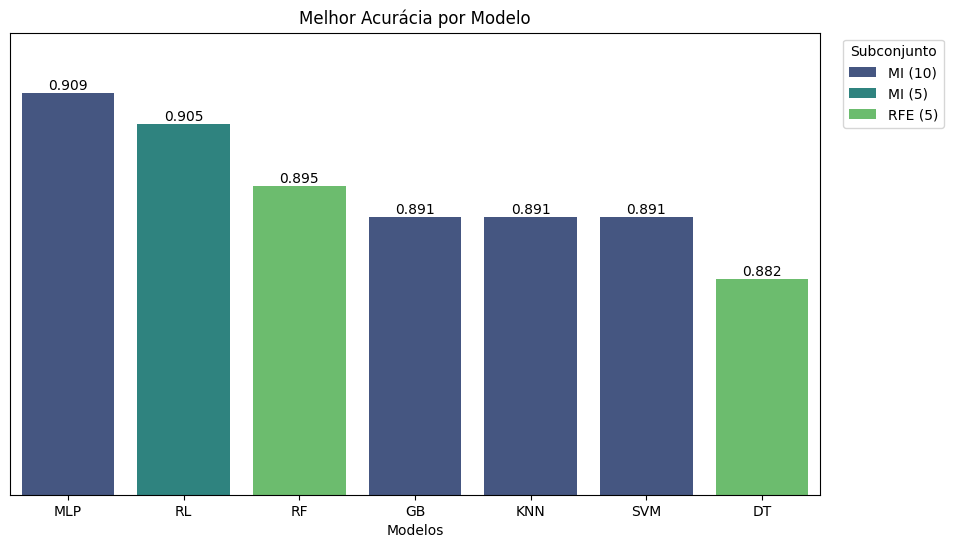

In [21]:
mapeamento_modelos = {
    "Gradient Boosting": "GB",
    "Random Forest": "RF",
    "Regressão Logística": "RL",
    "MLP": "MLP",
    "KNN": "KNN",
    "Decision Tree": "DT",
    "SVM": "SVM"
}


melhores_resultados = df_resultados.loc[df_resultados.groupby("Modelo")["Acurácia"].idxmax()]


melhores_resultados["Modelo_Abreviado"] = melhores_resultados["Modelo"].map(mapeamento_modelos)
melhores_resultados["Subconjunto_Abreviado"] = melhores_resultados["Subconjunto"].map(mapeamento_nomes)



melhores_resultados = melhores_resultados.sort_values(by="Acurácia", ascending=False)

plt.figure(figsize=(12,6))


plt.subplots_adjust(right=0.8)


ax = sns.barplot(
    data=melhores_resultados,
    x="Modelo_Abreviado",
    y="Acurácia",
    hue="Subconjunto_Abreviado",
    dodge=False,
    palette="viridis"
)


ax.set_yticks([])
ax.set_ylabel("")


for p in ax.patches:
    height = p.get_height()
    if height > 0.01:
        ax.annotate(
            f'{height:.3f}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            fontsize=10
        )


plt.title("Melhor Acurácia por Modelo")
plt.xlabel("Modelos")
plt.legend(title="Subconjunto", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylim(0.85, 0.918)

plt.show()
